# İsim Soyisim: Abdullah MEMİŞOĞLU
# Öğrenci Numarası: 171024001


# ÖDEV-4 -- SORU-6

## a) 2.33 Sistemin dürtü cevabını bulma

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
def dirac(n):
    if n == 0:
        return 1
    else:
        return 0
#for i in range(-8,8,1):
#    print("{}:{}".format(i,dirac(i)))

## $y[n] = -2x[n] + 4x[n-1] - 2x[n-2]$ eq.1
## Sisteme $ \delta[n] $ girdi olarak verilirse sistemin çıkışında dürtü yanıtı elde edilir. Bu bilgi kullanılarak eq.1 denkleminde x  girdi sinyalleri  $ \delta[n] $ olarak yazıldığında y[n] = h[n] ile dürtü yanıtı elde edilir. 

##  $h[n] = -2\delta[n] + 4\delta[n-1] - 2\delta[n-2]$

Text(0, 0.5, 'h[n]')

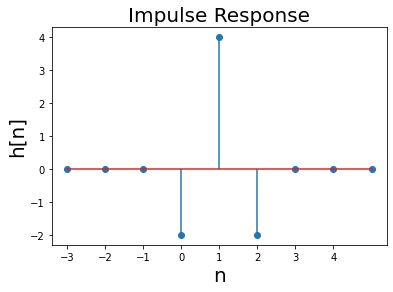

In [20]:
def imp_resp(n):
    h = -2*dirac(n) + 4*dirac(n-1) - 2*dirac(n - 2)
    return h


START = -3
END = 5

n = np.linspace(START,END,(END - START + 1))
h = np.zeros(len(n))

for i in range(len(n)):
    h[i] = imp_resp(i + START) 
    # first i value = 0 but it should be -8 because of the n interval
plt.stem(n,h,use_line_collection=True)
plt.title('Impulse Response', fontsize='20') 
plt.xticks(np.arange(n[0],n[-1],1))
plt.xlabel('n',  fontsize='20')  
plt.ylabel('h[n]',  fontsize='20') 

#for i in range(-8,8,1):
#    print("{}:{}".format(i,imp_resp(i)))


# ÖDEV-4 -- SORU-7

## a) 2.36 Sistemin frekans cevabını çizdirme

Text(0.5, 0, 'w(x$\\pi$)')

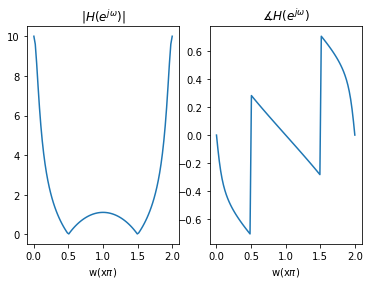

In [27]:
w_cont=np.linspace(0,2*np.pi,100)

H_phase=np.zeros(100)
H_abs=np.zeros(100)
i = 0
for w in w_cont:
    
    #H_abs[i]=np.abs(1 - np.exp(-1j*w))
    #H_phase[i] = np.angle(1 - np.exp(-1j*w))
    H_abs[i] = np.abs((1 + np.exp(-1j*2*w))/(1 - 0.8*np.exp(-1j*w)))
    H_phase[i] = np.angle((1 + np.exp(-1j*2*w))/(1 - 0.8*np.exp(-1j*w)))
    i+=1

plt.subplot(121)
plt.plot(w_cont/np.pi,H_abs)
plt.title('$|H(e^{j\omega})|$')
plt.xlabel('w(x$\pi$)')
plt.subplot(122)
plt.plot(w_cont/np.pi,H_phase/pi) 
plt.title('$ \measuredangle H(e^{j\omega})$')
plt.xlabel('w(x$\pi$)')



## Bu soruda özfonksiyon tanımı kullanabilmek için verilen x[n] sinyali aşağıdaki gibi yazılmalıdır.
## $ x[n] = 4 + 2cos(\omega_0n) = 4e^{j0} + 2cos(\omega_0n) $
# İkinci kısımda 2 adet özfonksiyondan oluşan bir yapı olduğundan y[n] sinyali direkt olarak aşağıdaki gibi yazılabilmektedir.
# $ y[n] = 4H(e^{j0}) + 2|H(e^{j\omega_0})|[cos(\omega_0n + \measuredangle H(e^{j\omega_0}))]$ 
# Yukarıdaki y[n] sinyalinin sabit değer alması +'dan sonraki değerin sıfırlanmasına bağlıdır. Bu değerin sıfırlanması ise $ |H(e^{j\omega_0})| = 0 $ ile mümkündür. Bu eşitliğin sağlandığı değerler($|H(e^{j\omega_0})|$ grafiğini sıfır yapan noktalara bakılarak) $ \omega_0 =\frac{\pi}{2} \space ve \space \omega_0 =\frac{3\pi}{2}$ olarak elde edilir. Bu durumda $ \omega_0 =\frac{\pi}{2}$ için y[n] sinyali değeri aşağıdaki gibi hesaplanır.

In [36]:
pi = np.pi
def freq_resp(w):
    H = (1 + np.exp(-1j*2*w))/(1 - 0.8*np.exp(-1j*w))
    return H
def freq_resp_amp(w):
    H = np.abs((1 + np.exp(-1j*2*w))/(1 - 0.8*np.exp(-1j*w)))
    return H
def freq_resp_phase(w):
    H = np.angle((1 + np.exp(-1j*2*w))/(1 - 0.8*np.exp(-1j*w)))
    return H

y = 4*freq_resp(0) + 2*freq_resp_amp(pi/2)*np.cos(pi/2 + freq_resp_phase(pi/2))
print(y)
print(np.abs(y))
"""y eşitliğinde kompleks sayılar ile işlem yapıldığından sonuç kompleks gösterimlidir. Ancak görüldüğü üzere ilgili w noktasında y[n] sinyali sabit değer alır ve y[n] = A için A = 40 değeri gözlenir"""


(40.00000000000001+0j)
40.00000000000001


'y eşitliğinde kompleks sayılar ile işlem yapıldığından sonuç kompleks gösterimlidir. Ancak görüldüğü üzere ilgili w noktasında y[n] sinyali sabit değer alır ve y[n] = A için A = 40 değeri gözlenir'